### Analysis of number of covid19 cases using ECDC data 

you can get data from: 
https://opendata.ecdc.europa.eu/covid19/casedistribution/csv

In [21]:
# first read data into a dataframe
import pandas as pd
data=pd.read_csv("covid19_ecdc_28_07_20.csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/07/2020,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,26/07/2020,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,25/07/2020,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,24/07/2020,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,23/07/2020,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [22]:
# create datetime objects for the "dateRep" column
data.dateRep=pd.to_datetime(data.dateRep,format="%d/%m/%Y")

In [23]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [24]:
# reshape the data: Show countries in rows, dates in columns and values should be cases
confirmed_by_country=data.pivot(index="countriesAndTerritories",columns="dateRep",values="cases")
confirmed_by_country.head()

dateRep,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,...,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00,2020-07-21 00:00:00,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,219.0,12.0,174.0,140.0,112.0,188.0,13.0,108.0,121.0,106.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,102.0,82.0,81.0,119.0,68.0,108.0,104.0,67.0,126.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,593.0,601.0,535.0,607.0,587.0,594.0,612.0,675.0,605.0,593.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,8.0,0.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,49.0,18.0,44.0,0.0,30.0,33.0,39.0,29.0,0.0


In [27]:
# calculate rolling average of cases for 7-day windows
confirmed_7day_mean=confirmed_by_country.rolling(7,min_periods=1,axis=1).mean()

In [28]:
confirmed_7day_mean

dateRep,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,...,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00,2020-07-21 00:00:00,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,131.857143,121.428571,146.285714,165.714286,141.000000,131.571429,122.571429,106.714286,122.285714,112.571429
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.714286,91.000000,90.857143,85.714286,89.000000,86.571429,87.857143,94.857143,89.857143,96.142857
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,591.428571,548.142857,555.571429,571.714286,580.285714,586.000000,589.857143,601.571429,602.142857,610.428571
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.571429,3.571429,3.571429,3.714286,3.285714,3.857143,1.714286,1.285714,2.428571,2.428571
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.714286,29.142857,28.428571,34.714286,32.000000,29.000000,29.285714,30.428571,27.571429,25.000000
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Antigua_and_Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.285714,0.857143,0.857143,0.857143
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3441.428571,3605.857143,3573.571429,3798.428571,3929.857143,4172.571429,4391.428571,4749.142857,4888.428571,5714.571429
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,442.571429,438.571429,415.428571,404.285714,457.571429,451.000000,436.285714,427.857143,407.857143,359.000000


In [29]:
# select countries whose number of cases to be plotted
selected_countries=["United_States_of_America","Brazil","Italy","Germany","United_Kingdom","India","Russia","Turkey"]

In [30]:
# now get data for these countries
data_selected=confirmed_7day_mean.loc[selected_countries]

In [31]:
data_selected

dateRep,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,...,2020-07-18 00:00:00,2020-07-19 00:00:00,2020-07-20 00:00:00,2020-07-21 00:00:00,2020-07-22 00:00:00,2020-07-23 00:00:00,2020-07-24 00:00:00,2020-07-25 00:00:00,2020-07-26 00:00:00,2020-07-27 00:00:00
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
United_States_of_America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66154.571429,66254.285714,66902.571429,66707.714286,67212.000000,67373.571429,65411.571429,66402.000000,66651.857143,65822.857143
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35071.571429,33572.857143,33386.857143,33382.714286,33261.428571,37252.285714,39332.000000,42434.000000,45664.714286,45814.571429
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,189.714286,198.428571,196.142857,199.142857,201.142857,218.000000,228.857143,231.857143,235.428571,240.571429
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,402.285714,395.714286,408.571429,483.142857,439.000000,444.000000,477.142857,513.142857,527.857143,540.857143
United_Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,729.428571,730.428571,741.285714,748.428571,634.857143,638.000000,656.285714,667.857143,659.285714,662.000000
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31114.285714,32580.714286,34255.571429,35491.285714,36676.285714,38537.000000,40587.571429,42592.142857,43986.285714,45344.285714
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7357.285714,7285.571429,6340.571429,6255.285714,6197.285714,6117.285714,6034.428571,5058.857143,5024.857143,5848.428571
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,976.285714,962.285714,949.714286,938.714286,929.571429,923.142857,920.285714,921.857143,922.285714,922.714286


In [32]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


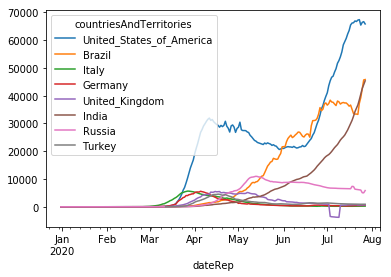

In [33]:
# plot confirmed cases vs time
data_selected.T.plot()

### Let's plot cumulative confirmed case number 

In [27]:
data_selected.head()

dateRep,2019-12-31,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27
countriesAndTerritories,,,,,,,,,,,,,,,,,,,,,
United_States_of_America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66154.571429,66254.285714,66902.571429,66707.714286,67212.000000,67373.571429,65411.571429,66402.000000,66651.857143,65822.857143
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35071.571429,33572.857143,33386.857143,33382.714286,33261.428571,37252.285714,39332.000000,42434.000000,45664.714286,45814.571429
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,189.714286,198.428571,196.142857,199.142857,201.142857,218.000000,228.857143,231.857143,235.428571,240.571429
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,402.285714,395.714286,408.571429,483.142857,439.000000,444.000000,477.142857,513.142857,527.857143,540.857143
United_Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,729.428571,730.428571,741.285714,748.428571,634.857143,638.000000,656.285714,667.857143,659.285714,662.000000


In [28]:
cumulative_cases=data_selected.

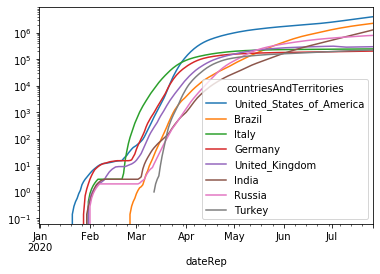

In [32]:
cumulative_cases.T.plot(logy=True)

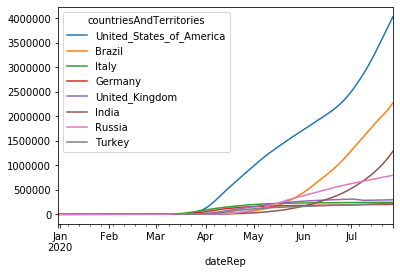

In [33]:
cumulative_cases.T.plot()

In [30]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


### How many countries are here? 

In [34]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
1,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
2,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
3,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
4,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098


In [35]:
# get the number of unique countriesAndTerritories
data.

210

In [36]:
# get the number of countryterritoryCode
data.

209

In [37]:
# drop duplicates for countriesAndTerritories and countryterritoryCode columns
no_duplicate=data.

In [38]:
no_duplicate

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
200,2020-07-27,27,7,2020,126,4,Albania,AL,ALB,2862427.0,Europe,45.730424
341,2020-07-27,27,7,2020,593,9,Algeria,DZ,DZA,43053054.0,Africa,18.958005
546,2020-07-27,27,7,2020,0,0,Andorra,AD,AND,76177.0,Europe,55.134752
682,2020-07-27,27,7,2020,0,0,Angola,AO,AGO,31825299.0,Africa,1.175166
...,...,...,...,...,...,...,...,...,...,...,...,...
31764,2020-07-27,27,7,2020,5,0,Vietnam,VN,VNM,96462108.0,Asia,0.049760
31970,2020-07-27,27,7,2020,0,0,Western_Sahara,EH,ESH,582458.0,Africa,42.406491
32063,2020-07-27,27,7,2020,7,5,Yemen,YE,YEM,29161922.0,Asia,0.740692
32172,2020-07-27,27,7,2020,153,9,Zambia,ZM,ZMB,17861034.0,Africa,14.478445


### select only two columns:  countriesAndTerritories and countryterritoryCode

In [40]:
no_duplicate_small=no_duplicate

In [41]:
no_duplicate_small

,countriesAndTerritories,countryterritoryCode
0,Afghanistan,AFG
200,Albania,ALB
341,Algeria,DZA
546,Andorra,AND
682,Angola,AGO
...,...,...
31764,Vietnam,VNM
31970,Western_Sahara,ESH
32063,Yemen,YEM
32172,Zambia,ZMB


- let's check if one code is used more than once

In [42]:
no_duplicate_small

CYP    1
MOZ    1
LSO    1
GGY    1
NPL    1
      ..
KAZ    1
ZAF    1
SLE    1
MEX    1
JAM    1
Name: countryterritoryCode, Length: 209, dtype: int64

- It seems one country does not have a code, let's find that country
- we need to find the row where we see countryterritoryCode as NaN

In [48]:
find_na=data.

In [49]:
find_na

0        False
1        False
2        False
3        False
4        False
         ...  
32427    False
32428    False
32429    False
32430    False
32431    False
Name: countryterritoryCode, Length: 32432, dtype: bool

In [45]:
no_duplicate_small

/Users/sefer_imac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,countriesAndTerritories,countryterritoryCode
5755,Cases_on_an_international_conveyance_Japan,NaN


### Let's play with columns

In [ ]:
data.head()

In [ ]:
# delete popData2019 and Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 columns
data_new=data.

In [ ]:
data_new.head()

### read population data using world_population.csv file

In [ ]:
pop=pd.

In [ ]:
pop.head()

In [ ]:
# extract only Country Name and 2019 columns
pop_19=pop

In [ ]:
pop_19

In [ ]:
data_new.head()

In [ ]:
# now add population information into data_new data frame
data_pop=pd.merge(data_new,pop_19,left_on="countriesAndTerritories",right_on="Country Name")

In [ ]:
data_pop.head()

In [ ]:
# rename 2019 column as population
data_pop.

In [ ]:
data_pop.head()

In [ ]:
data.head()